In [ ]:
##Experimental results - 

In [8]:
import sys
sys.path.append("..")
sys.path.append("../strategies")
import numpy as np
import random

In [9]:
from visualizer import Visualizer
from bandit import Bandit
from distributions import Binomial
from semiUniformStrategies import EpsilonGreedyStrategy
from semiUniformStrategies import EpsilonFirstStrategy
from ucbStrategies import UCB1Strategy
from ucbStrategies import UCB2Strategy
from softMaxStrategies import SoftMaxStrategyFixed

In [10]:
bandit = Bandit([
                 Binomial(1, .6), 
                 Binomial(1, .2),
                 Binomial(1, .9),
                 Binomial(1, 0),
                 Binomial(1, .7),
                 Binomial(1, .4),
                 Binomial(1, .3),
                 Binomial(1, .8),
                 Binomial(1, .5),
                 Binomial(1, .1)])

In [62]:
#epsilon greedy parameter tunning 
totalRegrets = []
for trials in range(10):
    for index, epsilon in enumerate(np.arange(0.0, .30, 0.01)):
        eGreedy = EpsilonGreedyStrategy(epsilon)
        plays, _, _ = eGreedy.run(1000, bandit)
        _, totalRegret = bandit.getRegret(plays)
        if trials == 0:
            totalRegrets.append(totalRegret)
        else:
            totalRegrets[index] += totalRegret
            
averageRegrets = [i / 30 for i in totalRegrets]

In [63]:
averageRegrets

[100.00000000000186,
 78.080000000000894,
 46.213333333333466,
 42.073333333333125,
 41.939999999999387,
 28.783333333333246,
 24.866666666666877,
 34.05999999999969,
 33.466666666666534,
 27.906666666666528,
 35.896666666666377,
 22.106666666666666,
 28.036666666666552,
 27.126666666666562,
 28.696666666666641,
 31.59999999999993,
 31.816666666666695,
 35.239999999999966,
 32.396666666666675,
 37.23999999999986,
 35.646666666666576,
 35.556666666666629,
 36.196666666666687,
 37.896666666666668,
 40.39333333333331,
 43.039999999999978,
 42.529999999999923,
 46.283333333333324,
 46.279999999999994,
 44.816666666666656]

In [40]:
##optimal epsilon: 0.06

In [65]:
#epsilon greedy parameter tunning 
totalRegrets = []
for trials in range(10):
    for index, epsilon in enumerate(np.arange(0.0, .30, 0.01)):
        eFirst = EpsilonFirstStrategy(epsilon)
        plays, _, _ = eFirst.run(1000, bandit)
        _, totalRegret = bandit.getRegret(plays)
        if trials == 0:
            totalRegrets.append(totalRegret)
        else:
            totalRegrets[index] += totalRegret
            
averageRegrets = [i / 30 for i in totalRegrets]

In [66]:
averageRegrets

[100.00000000000186,
 60.913333333333796,
 52.000000000000611,
 66.130000000000749,
 37.976666666666794,
 39.123333333333086,
 77.816666666666023,
 31.906666666666624,
 26.819999999999549,
 25.863333333332942,
 24.136666666666304,
 31.26333333333265,
 26.456666666666258,
 25.226666666666372,
 20.986666666666668,
 42.163333333332503,
 32.296666666666319,
 30.513333333333016,
 43.14666666666654,
 33.8999999999997,
 40.863333333332804,
 31.346666666666671,
 35.519999999999847,
 37.373333333333186,
 49.313333333332729,
 38.883333333333191,
 40.953333333333184,
 47.483333333332908,
 49.116666666666248,
 57.94666666666653]

In [43]:
##optimal epsilon: 0.10

In [76]:
#ucb2 parameter tuning 
totalRegrets = []
for trials in range(100):
    for index, alpha in enumerate(np.arange(0.01, .30, 0.01)):
        ucb2 = UCB2Strategy(alpha)
        plays, _, _ = ucb2.run(1000, bandit)
        _, totalRegret = bandit.getRegret(plays)
        if trials == 0:
            totalRegrets.append(totalRegret)
        else:
            totalRegrets[index] += totalRegret
            
averageRegrets = [i / 30 for i in totalRegrets]

In [78]:
averageRegrets

[152.22333333333356,
 153.91333333333372,
 159.01666666666713,
 163.89333333333374,
 165.13000000000042,
 169.99333333333382,
 168.31333333333365,
 170.68333333333368,
 179.50333333333381,
 176.06333333333384,
 177.8366666666671,
 181.97333333333376,
 183.75000000000045,
 183.08000000000038,
 189.66333333333387,
 186.00333333333376,
 194.56666666666706,
 193.87666666666712,
 191.90666666666704,
 201.5400000000003,
 196.94333333333364,
 206.94000000000034,
 203.07333333333352,
 199.93333333333371,
 200.99000000000026,
 208.81333333333365,
 207.04333333333366,
 208.02333333333371,
 215.15000000000029]

In [5]:
##optimal alpha: 0.05

In [22]:
##softmax
totalRegrets = []
for trials in range(100):
    for index, t in enumerate(np.arange(0.01, 0.3, .01)):
        sMax = SoftMaxStrategyFixed(t)
        plays, _, _ = sMax.run(1000, bandit)
        _, totalRegret = bandit.getRegret(plays)
        if trials == 0:
            totalRegrets.append(totalRegret)
        else:
            totalRegrets[index] += totalRegret
            
averageRegrets = [i / 100 for i in totalRegrets]

In [23]:
averageRegrets

[274.37300000000084,
 279.83200000000056,
 258.69000000000011,
 202.17599999999933,
 159.88899999999884,
 156.06899999999939,
 132.77799999999937,
 119.46399999999899,
 102.43199999999909,
 103.17499999999913,
 94.267999999999176,
 85.972999999999558,
 85.510999999999584,
 90.517999999999688,
 110.15899999999954,
 112.03199999999957,
 115.71399999999967,
 128.45899999999952,
 136.53899999999948,
 146.93799999999942,
 151.99799999999931,
 162.2249999999994,
 170.14299999999938,
 175.39099999999934,
 182.12399999999928,
 191.98799999999935,
 193.98899999999921,
 203.90499999999923,
 208.22799999999927]

In [18]:
##optimal temperature : 0.13

In [24]:
eGreedy = EpsilonGreedyStrategy(.06)
eFirst = EpsilonFirstStrategy(.10)
ucb1 = UCB1Strategy()
ucb2 = UCB2Strategy(.05)
sMax = SoftMaxStrategyFixed(0.13)

In [27]:
vis = Visualizer([eGreedy, eFirst, ucb1, ucb2, sMax],
                 ['Epsilon Greedy', 'Epsilon First', 'UCB1', 'UCB2', 'SoftMax']);
vis.run(1000, bandit)

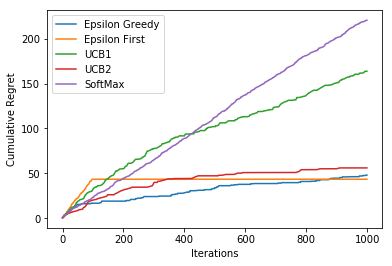

In [28]:
vis.graphCumulativeRegrets().show()

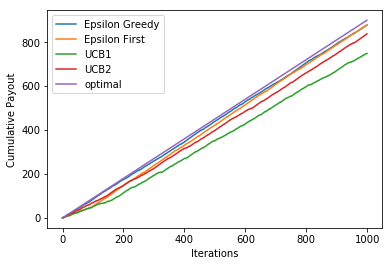

In [19]:
vis.graphCumulativePayouts(showOptimal=True).show()

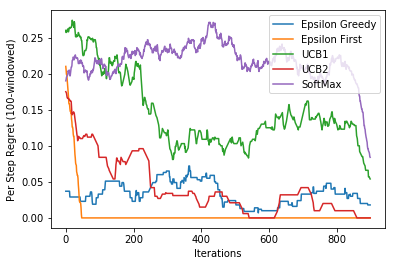

In [29]:
vis.graphPerStepRegret().show()